In [2]:
import os

print(os.getcwd())
!ls

/home/namndd3/Documents/wav2vec2-malay/datasets
annotations.csv        eval.csv		 test.csv   vocab.json
check_something.ipynb  split_data.ipynb  texts	    waves
datasets.zip	       submissions.csv	 train.csv


In [10]:
waves_dir = "waves/"
waves_lst = os.listdir(waves_dir)
print(len(waves_lst))

57886


In [5]:
import pandas as pd

annotations_df = pd.read_csv("annotations.csv")
annotations_df.head()

,path,transcript,duration
0,d0b5985f5104dafc6151a69c3bb03f73.wav,besar dan merangkumi pelbagai aspek maknanya b...,5.640
1,a2481d8bd7b2444c2659117c5fe6125d.wav,sekali lagi dia cukup best aku tak suruh kita ...,5.934
2,60b28de9c563e90a8c058e5a7f0ae4e6.wav,salam cikgu tube dan sumber sumber yang kita b...,5.645
3,a2047aac0ac67c5751f1c92f2c398c51.wav,seterusnya saya akan pergi kepada peranan muzi...,6.743
4,d887e5853ae600e9a269cc64dd31e4db.wav,sempat masak lagi eh sempat lagi pergi beli ba...,6.370


In [8]:
print(len(annotations_df))
annotations_df[annotations_df.duplicated()]

57758


,path,transcript,duration


In [37]:
annotations_df[annotations_df['path'].duplicated()]

,path,transcript,duration


In [44]:
annotations_df[annotations_df['transcript'].duplicated()]

,path,transcript,duration
249,f7328210b9e6483342add8f5b709eeb7.wav,tapi kita,1.460
1394,f8faafed06eddf8bad4aaee324cae687.wav,jalan kaki naik basikal juga,3.128
1432,9f752544531f65c698f4c3b00019122a.wav,murid yang berada di sekolah itu perlu berada ...,5.730
1491,99fc884410fe8dde91ac94796f8bf857.wav,itulah keputusan yang tepat bukan terpaksa yan...,6.981
1512,d81cd6e873fde0b32e16d3ff2776f874.wav,ibu bapa mempunyai hak untuk tidak menghantar ...,5.153
...,...,...,...
57694,0880b01d1c902a829803698ba980008e.wav,dengan berjaya dengan norma baharu walaupun kita,5.903
57722,38274cbc399b1a5c2c4a46ca2229039f.wav,seperti mana keadaan terdahulu jadi disiplin y...,6.097
57735,f118192260e1e8e39e936439fdb68474.wav,anak murid saya,2.260
57742,c4961509632454ce35ada946b49cd2c1.wav,murid secara peringkat mulai 15 haribulan bula...,6.421


In [54]:
dup_count = 0
for ix, txt in enumerate(annotations_df['transcript']):
    txt = txt.strip()
    count = 1
    txt_lst = [[ix, txt]]
    for ix_c, txt_c in enumerate(annotations_df['transcript']):
        txt_c = txt_c.strip()
        if txt == txt_c and ix != ix_c:
            count += 1
            txt_lst.append([ix_c, txt_c])
    if count > 1:
        print(txt_lst)
        dup_count += 1
print(dup_count)

[[47, 'siapa sepatutnya perlu memakai face masih ada ke murid semua kena pakai face mask'], [18008, 'siapa sepatutnya perlu memakai face masih ada ke murid semua kena pakai face mask'], [32452, 'siapa sepatutnya perlu memakai face masih ada ke murid semua kena pakai face mask'], [40968, 'siapa sepatutnya perlu memakai face masih ada ke murid semua kena pakai face mask']]
[[49, 'assalamualaikum dan jumpa lagi di lain'], [45472, 'assalamualaikum dan jumpa lagi di lain']]
[[57, 'siratan ladziina an amta alaihim'], [35136, 'siratan ladziina an amta alaihim'], [36556, 'siratan ladziina an amta alaihim']]
[[60, 'dan satu skim baru untuk anak didik kita anak cucu kita pada masa hadapan'], [54272, 'dan satu skim baru untuk anak didik kita anak cucu kita pada masa hadapan']]
[[64, 'sebelum sebelum diulas benda ni kita ada sedikit pesanan khidmat'], [9241, 'sebelum sebelum diulas benda ni kita ada sedikit pesanan khidmat'], [28723, 'sebelum sebelum diulas benda ni kita ada sedikit pesanan khidma

[[503, 'okeylah itu berkenaan dengan bilik darjah hutang yang pertama dah habis'], [2408, 'okeylah itu berkenaan dengan bilik darjah hutang yang pertama dah habis'], [23941, 'okeylah itu berkenaan dengan bilik darjah hutang yang pertama dah habis'], [47075, 'okeylah itu berkenaan dengan bilik darjah hutang yang pertama dah habis']]
[[507, 'ibu bapa mempunyai hak untuk tidak menghantar anak mereka ke sekolah'], [1512, 'ibu bapa mempunyai hak untuk tidak menghantar anak mereka ke sekolah'], [9005, 'ibu bapa mempunyai hak untuk tidak menghantar anak mereka ke sekolah'], [31580, 'ibu bapa mempunyai hak untuk tidak menghantar anak mereka ke sekolah']]
[[514, 'pengetua pengetua guru guru sekolah yang turut terlibat menjayakan program ini'], [44692, 'pengetua pengetua guru guru sekolah yang turut terlibat menjayakan program ini']]
[[533, 'dan konsep kecemerlangan itu menghendakkan kita sentiasa berubah'], [5918, 'dan konsep kecemerlangan itu menghendakkan kita sentiasa berubah'], [21269, 'dan

[[822, 'kata kata hasil pembelajaran itu dapat dicapai dan ini merupakan satu impak besar melalui pembelajaran digital yang kita dah laksanakanlah baru baru ini'], [24569, 'kata kata hasil pembelajaran itu dapat dicapai dan ini merupakan satu impak besar melalui pembelajaran digital yang kita dah laksanakanlah baru baru ini'], [55445, 'kata kata hasil pembelajaran itu dapat dicapai dan ini merupakan satu impak besar melalui pembelajaran digital yang kita dah laksanakanlah baru baru ini']]
[[827, 'perlu diutamakan itu di rumah lagi ya dan diingatkan bahawa mereka mesti memakai pakaian yang bersih yang'], [16394, 'perlu diutamakan itu di rumah lagi ya dan diingatkan bahawa mereka mesti memakai pakaian yang bersih yang'], [41250, 'perlu diutamakan itu di rumah lagi ya dan diingatkan bahawa mereka mesti memakai pakaian yang bersih yang']]
[[828, 'daripada dapatan soal selidik yang melibatkan 565 orang'], [41177, 'daripada dapatan soal selidik yang melibatkan 565 orang']]
[[834, 'pergerakan

[[1203, 'bahkan al quran pun menyebutkan tentang antara sifat ulama ulama dan rabai yahudi'], [34536, 'bahkan al quran pun menyebutkan tentang antara sifat ulama ulama dan rabai yahudi']]
[[1209, 'yang menaiki bas sekolah apa yang telah kita'], [7318, 'yang menaiki bas sekolah apa yang telah kita'], [17030, 'yang menaiki bas sekolah apa yang telah kita'], [33123, 'yang menaiki bas sekolah apa yang telah kita']]
[[1214, 'bahagia set pengurusan sekolah langkah pertama'], [19154, 'bahagia set pengurusan sekolah langkah pertama']]
[[1217, 'aku yang persekolahan secara prinsipnya memang kita cuba untuk meletakkan satu jumlah'], [32868, 'aku yang persekolahan secara prinsipnya memang kita cuba untuk meletakkan satu jumlah'], [36089, 'aku yang persekolahan secara prinsipnya memang kita cuba untuk meletakkan satu jumlah'], [54064, 'aku yang persekolahan secara prinsipnya memang kita cuba untuk meletakkan satu jumlah']]
[[1220, 'anak anak kita yang pada usia enam tahun ke bawah ini mereka'], [2

[[1498, 'dan jika berlaku salah faham dahulu pada peringkat awalnya dalam mentafsir'], [8326, 'dan jika berlaku salah faham dahulu pada peringkat awalnya dalam mentafsir']]
[[1509, 'yang penggunaan cecair pembasmi kuman yang kedua'], [57179, 'yang penggunaan cecair pembasmi kuman yang kedua']]
[[1512, 'ibu bapa mempunyai hak untuk tidak menghantar anak mereka ke sekolah'], [507, 'ibu bapa mempunyai hak untuk tidak menghantar anak mereka ke sekolah'], [9005, 'ibu bapa mempunyai hak untuk tidak menghantar anak mereka ke sekolah'], [31580, 'ibu bapa mempunyai hak untuk tidak menghantar anak mereka ke sekolah']]
[[1516, 'world langsung univariate lekas adakah'], [6521, 'world langsung univariate lekas adakah']]
[[1537, 'tapi orang islam lain islam yang mereka tak kenal mereka tak bagi'], [54974, 'tapi orang islam lain islam yang mereka tak kenal mereka tak bagi']]
[[1538, 'manakala model yang kedua ialah model dua cc'], [13705, 'manakala model yang kedua ialah model dua cc'], [22210, 'mana

[[1946, 'tetapi kita dapati murid murid prasekolah kebanyakkan menggunakannya okey ini ialah'], [4516, 'tetapi kita dapati murid murid prasekolah kebanyakkan menggunakannya okey ini ialah'], [17121, 'tetapi kita dapati murid murid prasekolah kebanyakkan menggunakannya okey ini ialah'], [32756, 'tetapi kita dapati murid murid prasekolah kebanyakkan menggunakannya okey ini ialah']]
[[1948, 'dan juga kalau kita lihat juga dalam konteks pembedahan contohnya'], [56403, 'dan juga kalau kita lihat juga dalam konteks pembedahan contohnya']]
[[1957, 'paradigm strategi kita pendekatan kita cara kita yang biasa ini semua adalah melalui bagaimana kita menggunakan'], [16418, 'paradigm strategi kita pendekatan kita cara kita yang biasa ini semua adalah melalui bagaimana kita menggunakan']]
[[1980, 'dipaparkan dengan jelas dan hubungilah pusat kesihatan daerah minta'], [3477, 'dipaparkan dengan jelas dan hubungilah pusat kesihatan daerah minta'], [10013, 'dipaparkan dengan jelas dan hubungilah pusat 

[[2356, 'dan yang lebih menyedihkan ialah okey betul yang saya sebutkan tadi yang berkerja la'], [31494, 'dan yang lebih menyedihkan ialah okey betul yang saya sebutkan tadi yang berkerja la'], [44333, 'dan yang lebih menyedihkan ialah okey betul yang saya sebutkan tadi yang berkerja la']]
[[2358, 'pemantauan secara berkala akan dilakukan oleh para guru segera laporkan kepada warden asrama'], [13825, 'pemantauan secara berkala akan dilakukan oleh para guru segera laporkan kepada warden asrama'], [28218, 'pemantauan secara berkala akan dilakukan oleh para guru segera laporkan kepada warden asrama']]
[[2382, 'jika kemudahan ambulans ada ambulans akan menjemput mereka untuk dibawa terus ke hospital'], [12494, 'jika kemudahan ambulans ada ambulans akan menjemput mereka untuk dibawa terus ke hospital']]
[[2408, 'okeylah itu berkenaan dengan bilik darjah hutang yang pertama dah habis'], [503, 'okeylah itu berkenaan dengan bilik darjah hutang yang pertama dah habis'], [23941, 'okeylah itu ber

[[2723, 'kita hari ini ada tujuh kelebihan you as pada hari ini alhamdulillah'], [25738, 'kita hari ini ada tujuh kelebihan you as pada hari ini alhamdulillah']]
[[2736, 'kalau kita perhatikan peperiksaan untuk spm spm bertulis'], [28975, 'kalau kita perhatikan peperiksaan untuk spm spm bertulis'], [42078, 'kalau kita perhatikan peperiksaan untuk spm spm bertulis'], [52323, 'kalau kita perhatikan peperiksaan untuk spm spm bertulis']]
[[2799, 'jadi ni adik beradik bapak dia jadi dia kata allahuakbar'], [16859, 'jadi ni adik beradik bapak dia jadi dia kata allahuakbar']]
[[2803, 'so dalam konteks ini saya nak katakan bahawa dunia maya ini merupakan satu keperluan lagi dah'], [39521, 'so dalam konteks ini saya nak katakan bahawa dunia maya ini merupakan satu keperluan lagi dah']]
[[2804, 'ikuti siri video berikutnya untuk mengetahui prosedur prosedur berkaitan persekolahan'], [8104, 'ikuti siri video berikutnya untuk mengetahui prosedur prosedur berkaitan persekolahan'], [36228, 'ikuti si

[[3011, 'dia antara yang dia mengakui bahawa dia termasuk sama seperti yahudi lain pada awalnya tak senang dan tak selesa dengan kehadiran nabi muhammad'], [52400, 'dia antara yang dia mengakui bahawa dia termasuk sama seperti yahudi lain pada awalnya tak senang dan tak selesa dengan kehadiran nabi muhammad']]
[[3020, '17 hingga 18 dan 25 hingga 22 hingga 25 februari 2002 satu juga'], [12186, '17 hingga 18 dan 25 hingga 22 hingga 25 februari 2002 satu juga'], [27182, '17 hingga 18 dan 25 hingga 22 hingga 25 februari 2002 satu juga'], [57382, '17 hingga 18 dan 25 hingga 22 hingga 25 februari 2002 satu juga']]
[[3041, 'sekolah menengah bercinta lagi benda ni yang telah kita keluarkan berkaitan dengan kehadiran murid murid'], [27026, 'sekolah menengah bercinta lagi benda ni yang telah kita keluarkan berkaitan dengan kehadiran murid murid']]
[[3044, 'spm stam dan sebagainya yang bermula pada'], [11494, 'spm stam dan sebagainya yang bermula pada'], [24529, 'spm stam dan sebagainya yang berm

[[3421, 'bila sebut siapa mau jadi pertama adalah sebut nama lain ada nama nur nama yang paling ramai macam tu'], [51969, 'bila sebut siapa mau jadi pertama adalah sebut nama lain ada nama nur nama yang paling ramai macam tu']]
[[3435, 'aku fikir ini kerana dia menjadi teras kepada cabaran cabaran untuk kemahiran akan datang'], [25854, 'aku fikir ini kerana dia menjadi teras kepada cabaran cabaran untuk kemahiran akan datang']]
[[3448, 'masalah utama sekolah di atas kehadiran yang bawah 60 peratus tutup'], [4623, 'masalah utama sekolah di atas kehadiran yang bawah 60 peratus tutup']]
[[3457, 'ia akan membahayakan dan memudaratkan bagaimana pula sekiranya'], [23135, 'ia akan membahayakan dan memudaratkan bagaimana pula sekiranya']]
[[3465, 'dinasihatkan agar memerhatikan tanda tanda ketidaksihatan itu saya ada suruh mereka tinggi'], [3977, 'dinasihatkan agar memerhatikan tanda tanda ketidaksihatan itu saya ada suruh mereka tinggi'], [18826, 'dinasihatkan agar memerhatikan tanda tanda ke

[[3773, 'apa saya nampak saya sebagai kan satu keseronokan kegembiraan kepada mereka orang putih kata'], [13007, 'apa saya nampak saya sebagai kan satu keseronokan kegembiraan kepada mereka orang putih kata']]
[[3786, 'kawan kawan kita nak waktu tengah hari lagilah bila kantin lah akan dijadikan tempat'], [39998, 'kawan kawan kita nak waktu tengah hari lagilah bila kantin lah akan dijadikan tempat']]
[[3792, 'untuk memudahkan ini antara prinsip prinsip yang terbukti berjaya khususnya dalam bidang perniagaan'], [35365, 'untuk memudahkan ini antara prinsip prinsip yang terbukti berjaya khususnya dalam bidang perniagaan']]
[[3805, 'penjadualan semula peperiksaan peperiksaan awam ini selepas takwim persekolahan kita disusun'], [52209, 'penjadualan semula peperiksaan peperiksaan awam ini selepas takwim persekolahan kita disusun'], [52770, 'penjadualan semula peperiksaan peperiksaan awam ini selepas takwim persekolahan kita disusun'], [53707, 'penjadualan semula peperiksaan peperiksaan awam 

[[4270, 'dia terus ke hutan melalui menggunakan ambulans dan jika pada masa itu di sekolah yang besar bandar yang banyak'], [6250, 'dia terus ke hutan melalui menggunakan ambulans dan jika pada masa itu di sekolah yang besar bandar yang banyak'], [46803, 'dia terus ke hutan melalui menggunakan ambulans dan jika pada masa itu di sekolah yang besar bandar yang banyak'], [57330, 'dia terus ke hutan melalui menggunakan ambulans dan jika pada masa itu di sekolah yang besar bandar yang banyak']]
[[4290, 'banyak sekolah di kelantan terengganu selangor kuala lumpur sabah'], [26800, 'banyak sekolah di kelantan terengganu selangor kuala lumpur sabah'], [54914, 'banyak sekolah di kelantan terengganu selangor kuala lumpur sabah']]
[[4297, 'esok prinsip prinsip ini kalau kita dapat laksanakan di sekolah dalam konteks sikit'], [14293, 'esok prinsip prinsip ini kalau kita dapat laksanakan di sekolah dalam konteks sikit']]
[[4301, 'mereka bersarapan dan barulah bekalan makanan ke sekolah ya yang dimas

[[4770, 'dan perkara ini dilakukan dengan'], [14024, 'dan perkara ini dilakukan dengan'], [40197, 'dan perkara ini dilakukan dengan'], [45258, 'dan perkara ini dilakukan dengan']]
[[4778, 'sedarkan kepada anak murid kita kepada ibu bapa penjaga dan sebagainya jangan sekali kali'], [866, 'sedarkan kepada anak murid kita kepada ibu bapa penjaga dan sebagainya jangan sekali kali'], [10379, 'sedarkan kepada anak murid kita kepada ibu bapa penjaga dan sebagainya jangan sekali kali']]
[[4782, 'la ilaha illallah wahidul qahar'], [9064, 'la ilaha illallah wahidul qahar'], [26942, 'la ilaha illallah wahidul qahar'], [52401, 'la ilaha illallah wahidul qahar'], [55533, 'la ilaha illallah wahidul qahar']]
[[4794, 'kemahiran diploma big data dan analitik ini semua adalah kemahiran kemahiran yang perlu ada'], [24871, 'kemahiran diploma big data dan analitik ini semua adalah kemahiran kemahiran yang perlu ada']]
[[4803, 'yang tinggi untuk mereka nak juga kita kalau kita perhatikan cuti akhir tahun ju

[[5119, 'ada nasi lemak ada bihun goreng ada mi goreng air sekali jadi dia berbalik berbaris membeli makanan dan minuman'], [11078, 'ada nasi lemak ada bihun goreng ada mi goreng air sekali jadi dia berbalik berbaris membeli makanan dan minuman']]
[[5122, 'pemimpin sesuatu kaum yang ditaati oleh kaumnya'], [20307, 'pemimpin sesuatu kaum yang ditaati oleh kaumnya']]
[[5124, 'adib adidi dibina di kawasan laluan utama murid dengan singki'], [35406, 'adib adidi dibina di kawasan laluan utama murid dengan singki']]
[[5126, 'ikan maklumat maklumat berkaitan dengan diri mereka yang ada kontak rapat dengan pesan'], [29053, 'ikan maklumat maklumat berkaitan dengan diri mereka yang ada kontak rapat dengan pesan']]
[[5146, 'ada itu majikan perlu mengambil perhatian itu kenapa mesej tu cukup jelas'], [5590, 'ada itu majikan perlu mengambil perhatian itu kenapa mesej tu cukup jelas']]
[[5153, 'cantik bah ni kita berkongsi ni'], [8744, 'cantik bah ni kita berkongsi ni'], [12543, 'cantik bah ni kita 

[[5526, 'antara lain yang banyak dibincangkan semasa lawatan ke sekolah saya elok'], [28192, 'antara lain yang banyak dibincangkan semasa lawatan ke sekolah saya elok']]
[[5528, 'pentadbir sekolah guru yang bijaksana cuba menyelesaikan pelbagai isu ini'], [13262, 'pentadbir sekolah guru yang bijaksana cuba menyelesaikan pelbagai isu ini'], [19038, 'pentadbir sekolah guru yang bijaksana cuba menyelesaikan pelbagai isu ini'], [31360, 'pentadbir sekolah guru yang bijaksana cuba menyelesaikan pelbagai isu ini']]
[[5529, 'okey kalau lani pun kalau kita malam 24jam gelap 24 jam'], [20936, 'okey kalau lani pun kalau kita malam 24jam gelap 24 jam']]
[[5538, 'tapi meja yang kedua disebelah belakang itu'], [1861, 'tapi meja yang kedua disebelah belakang itu'], [22891, 'tapi meja yang kedua disebelah belakang itu'], [26100, 'tapi meja yang kedua disebelah belakang itu']]
[[5544, 'kedatangan ibu bapa ke sekolah juga sebenarnya kita melawat melawat dana ada pertanyaan pada saya'], [22139, 'kedatang

[[5954, 'untuk memasuki tandas ada sekolah yang mengambil pelbagai inisiatif'], [8873, 'untuk memasuki tandas ada sekolah yang mengambil pelbagai inisiatif'], [11320, 'untuk memasuki tandas ada sekolah yang mengambil pelbagai inisiatif'], [55003, 'untuk memasuki tandas ada sekolah yang mengambil pelbagai inisiatif']]
[[5956, 'pengukuran itu bukan dari meja ke meja tetapi pengukuran itu dari persen tu'], [1471, 'pengukuran itu bukan dari meja ke meja tetapi pengukuran itu dari persen tu'], [27616, 'pengukuran itu bukan dari meja ke meja tetapi pengukuran itu dari persen tu'], [47235, 'pengukuran itu bukan dari meja ke meja tetapi pengukuran itu dari persen tu']]
[[5976, 'jika susun atur itu perlu dirombak semula sila rombak semula dan padam pelajar pelajar atau murid'], [15260, 'jika susun atur itu perlu dirombak semula sila rombak semula dan padam pelajar pelajar atau murid']]
[[5989, 'ataupun dari payah daripada individu individu yang lain itu meja yang pertama 2 yang pertama'], [2876

[[6404, 'terhindar daripada kuman dan sebagainya sebabnya mungkin dan digalakkan juga pada pagi itu'], [4707, 'terhindar daripada kuman dan sebagainya sebabnya mungkin dan digalakkan juga pada pagi itu'], [11351, 'terhindar daripada kuman dan sebagainya sebabnya mungkin dan digalakkan juga pada pagi itu'], [49637, 'terhindar daripada kuman dan sebagainya sebabnya mungkin dan digalakkan juga pada pagi itu']]
[[6418, 'apa dikatakan apa dipelajari murid ni di sekolah sejak 200 tahun dahulu'], [56099, 'apa dikatakan apa dipelajari murid ni di sekolah sejak 200 tahun dahulu']]
[[6422, 'sekolah petang ataupun ada kaedah lain yang dipilih oleh guru di sekolah'], [40089, 'sekolah petang ataupun ada kaedah lain yang dipilih oleh guru di sekolah'], [44130, 'sekolah petang ataupun ada kaedah lain yang dipilih oleh guru di sekolah'], [54496, 'sekolah petang ataupun ada kaedah lain yang dipilih oleh guru di sekolah']]
[[6424, 'kamu kekasih yang lain jadi dalam hati ini satu sesi'], [44325, 'kamu ke

[[6761, 'pada masa yang sama guru guru bimbingan kaunseling dan juga beranggapan'], [33722, 'pada masa yang sama guru guru bimbingan kaunseling dan juga beranggapan']]
[[6767, 'di dalam hal ini perbincangan dengan pengusaha kantin perlu dilakukan supaya kaedah tempahan awal ini'], [29103, 'di dalam hal ini perbincangan dengan pengusaha kantin perlu dilakukan supaya kaedah tempahan awal ini'], [32677, 'di dalam hal ini perbincangan dengan pengusaha kantin perlu dilakukan supaya kaedah tempahan awal ini']]
[[6768, 'yang penting murid menutup muka mereka dengan penutup muka yang sesuai tetapi di pasaran sekarang ni'], [5179, 'yang penting murid menutup muka mereka dengan penutup muka yang sesuai tetapi di pasaran sekarang ni'], [56328, 'yang penting murid menutup muka mereka dengan penutup muka yang sesuai tetapi di pasaran sekarang ni']]
[[6771, 'menyediakan segala kemudahan dan kelengkapan yang semampu kita untuk memastikan keselamatan'], [13887, 'menyediakan segala kemudahan dan keleng

[[7215, 'assalamualaikum warahmatullahi'], [6949, 'assalamualaikum warahmatullahi']]
[[7226, 'alhamdulillah adik sihat syukur dengan nikmat allah yang'], [14590, 'alhamdulillah adik sihat syukur dengan nikmat allah yang'], [27507, 'alhamdulillah adik sihat syukur dengan nikmat allah yang'], [45871, 'alhamdulillah adik sihat syukur dengan nikmat allah yang']]
[[7235, 'keutamaan perlu kita berikan kepada murid tingkatan 5 dan 6 kita dah kira dah'], [34568, 'keutamaan perlu kita berikan kepada murid tingkatan 5 dan 6 kita dah kira dah'], [39702, 'keutamaan perlu kita berikan kepada murid tingkatan 5 dan 6 kita dah kira dah'], [40025, 'keutamaan perlu kita berikan kepada murid tingkatan 5 dan 6 kita dah kira dah']]
[[7244, 'satu ada yang meletakkan apa tu kertas yang berwarna'], [379, 'satu ada yang meletakkan apa tu kertas yang berwarna']]
[[7249, 'okey ayah setelah melakukan lawatan kunjung bantu di beberapa buah sekolah'], [1389, 'okey ayah setelah melakukan lawatan kunjung bantu di beb

[[7566, 'mereka cukup berdisiplin sungguh mereka apabila nak mengambil makanan'], [10715, 'mereka cukup berdisiplin sungguh mereka apabila nak mengambil makanan']]
[[7576, 'mengharuskan perkara ni tak ada istilah baik'], [32780, 'mengharuskan perkara ni tak ada istilah baik']]
[[7596, 'yang telah disiapkan sebenarnya pada kami dah ready pada 2 minggu yang'], [24820, 'yang telah disiapkan sebenarnya pada kami dah ready pada 2 minggu yang']]
[[7610, 'wahai orang orang yang beriman jagalah diri kamu dan jagalah'], [38912, 'wahai orang orang yang beriman jagalah diri kamu dan jagalah']]
[[7622, 'kita guna hashtag baru hashtag kita jaga anak anak murid'], [27145, 'kita guna hashtag baru hashtag kita jaga anak anak murid']]
[[7627, 'tak suka tak senang tak selesa nabi muhammad datang ke madinah'], [29656, 'tak suka tak senang tak selesa nabi muhammad datang ke madinah']]
[[7637, 'stpm stam dan sebagainya dia sebagaimana untuk isu ini'], [6173, 'stpm stam dan sebagainya dia sebagaimana untuk 

[[7987, 'kenapa ketawa umruka bil ma ruf wan nahyu anil mungkar sedekah'], [27260, 'kenapa ketawa umruka bil ma ruf wan nahyu anil mungkar sedekah']]
[[7993, 'subhanakala ilmalana illa ma allamtana innaka antal'], [19157, 'subhanakala ilmalana illa ma allamtana innaka antal']]
[[8019, 'tertekan dengan kaki saja keluar sabun yang cecair'], [3893, 'tertekan dengan kaki saja keluar sabun yang cecair'], [15042, 'tertekan dengan kaki saja keluar sabun yang cecair']]
[[8026, 'perlu dibekalkan dengan penutup muka dalam hal ini siapa yang perlu menyediakan perliter muka'], [32245, 'perlu dibekalkan dengan penutup muka dalam hal ini siapa yang perlu menyediakan perliter muka'], [45226, 'perlu dibekalkan dengan penutup muka dalam hal ini siapa yang perlu menyediakan perliter muka']]
[[8031, 'dalam bentuk yang konvensional dengan maksudnya'], [761, 'dalam bentuk yang konvensional dengan maksudnya'], [8283, 'dalam bentuk yang konvensional dengan maksudnya'], [39678, 'dalam bentuk yang konvensional

[[8393, 'tetapi sekarang ini digital ini tengah berlaku hari ini bukan lagi masa depan tetapi hari ini'], [46095, 'tetapi sekarang ini digital ini tengah berlaku hari ini bukan lagi masa depan tetapi hari ini']]
[[8395, 'sebab sekarang ni kita boleh tandakan selepas subuh tu cerah'], [56029, 'sebab sekarang ni kita boleh tandakan selepas subuh tu cerah']]
[[8397, 'yang kedua dan lembu bulan bila digoncang kali yang kedua barulah lekang belum berubah'], [51841, 'yang kedua dan lembu bulan bila digoncang kali yang kedua barulah lekang belum berubah']]
[[8417, 'bungkusan tapi yang paling baik bawa makanan sendiri'], [41499, 'bungkusan tapi yang paling baik bawa makanan sendiri']]
[[8427, 'macam mana nak eja sekolah buat untuk malam ni cuci tangan'], [55375, 'macam mana nak eja sekolah buat untuk malam ni cuci tangan']]


KeyboardInterrupt: 

In [9]:
for p in annotations_df['path']:
    wav_p = waves_dir + p
    if not os.path.exists(wav_p):
        print(p)

In [18]:
for p in waves_lst[:2]:
    if not p in annotations_df['path'].values.tolist():
        print(p)

/home/namndd3/anaconda3/envs/nam_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

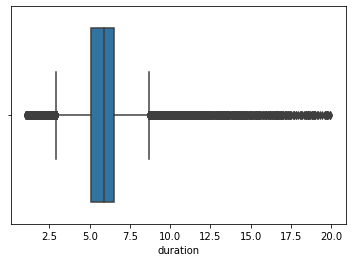

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(annotations_df['duration'])

In [31]:
duration_df = annotations_df[annotations_df['duration'] <= 10]

In [32]:
len(duration_df)

56916

In [33]:
duration_df.head()

,path,transcript,duration
0,d0b5985f5104dafc6151a69c3bb03f73.wav,besar dan merangkumi pelbagai aspek maknanya b...,5.640
1,a2481d8bd7b2444c2659117c5fe6125d.wav,sekali lagi dia cukup best aku tak suruh kita ...,5.934
2,60b28de9c563e90a8c058e5a7f0ae4e6.wav,salam cikgu tube dan sumber sumber yang kita b...,5.645
3,a2047aac0ac67c5751f1c92f2c398c51.wav,seterusnya saya akan pergi kepada peranan muzi...,6.743
4,d887e5853ae600e9a269cc64dd31e4db.wav,sempat masak lagi eh sempat lagi pergi beli ba...,6.370


In [34]:
duration_df.to_csv('annotations_d10.csv', index=False)

In [36]:
submission_df = pd.read_csv('submissions.csv')
print(len(submission_df))
submission_df.head()

57885


,path,transcript
0,datasets/waves/d0b5985f5104dafc6151a69c3bb03f7...,besar dan merangkumi pelbagai aspek maknanya b...
1,datasets/waves/a2481d8bd7b2444c2659117c5fe6125...,sekali lagi dia cukup best aku tak suruh kita ...
2,datasets/waves/60b28de9c563e90a8c058e5a7f0ae4e...,salam cikgu tube dan sumber-sumber yang kita b...
3,datasets/waves/a2047aac0ac67c5751f1c92f2c398c5...,Seterusnya saya akan pergi kepada peranan muzi...
4,datasets/waves/d887e5853ae600e9a269cc64dd31e4d...,sempat masak lagi eh Sempat lagi pergi beli ba...


In [56]:
duration_df.head()

,path,transcript,duration
0,d0b5985f5104dafc6151a69c3bb03f73.wav,besar dan merangkumi pelbagai aspek maknanya b...,5.640
1,a2481d8bd7b2444c2659117c5fe6125d.wav,sekali lagi dia cukup best aku tak suruh kita ...,5.934
2,60b28de9c563e90a8c058e5a7f0ae4e6.wav,salam cikgu tube dan sumber sumber yang kita b...,5.645
3,a2047aac0ac67c5751f1c92f2c398c51.wav,seterusnya saya akan pergi kepada peranan muzi...,6.743
4,d887e5853ae600e9a269cc64dd31e4db.wav,sempat masak lagi eh sempat lagi pergi beli ba...,6.370


In [57]:
duration_df[duration_df['transcript'].duplicated()]

,path,transcript,duration
249,f7328210b9e6483342add8f5b709eeb7.wav,tapi kita,1.460
1394,f8faafed06eddf8bad4aaee324cae687.wav,jalan kaki naik basikal juga,3.128
1432,9f752544531f65c698f4c3b00019122a.wav,murid yang berada di sekolah itu perlu berada ...,5.730
1491,99fc884410fe8dde91ac94796f8bf857.wav,itulah keputusan yang tepat bukan terpaksa yan...,6.981
1512,d81cd6e873fde0b32e16d3ff2776f874.wav,ibu bapa mempunyai hak untuk tidak menghantar ...,5.153
...,...,...,...
57694,0880b01d1c902a829803698ba980008e.wav,dengan berjaya dengan norma baharu walaupun kita,5.903
57722,38274cbc399b1a5c2c4a46ca2229039f.wav,seperti mana keadaan terdahulu jadi disiplin y...,6.097
57735,f118192260e1e8e39e936439fdb68474.wav,anak murid saya,2.260
57742,c4961509632454ce35ada946b49cd2c1.wav,murid secara peringkat mulai 15 haribulan bula...,6.421


In [64]:
duration_df[duration_df['duration'].duplicated()]

,path,transcript,duration
90,efc117b35d74fcd4c6d080606f32b01d.wav,kita tahu kita pun tak tahu bila confirm balik...,6.832
120,461d722a76a44fdb990c64dbe8965ee7.wav,saya bermula dengan dia sel rd90 aku ni bukan ...,6.152
138,d1ae824f2a01214b34418262c34f2424.wav,sebab sebab ramai tanya dalam tu perkongsian b...,6.526
190,2459a0905293f1a057c77f6c24c20bc1.wav,jadi cakupan cricket yang terkesan tu saya dah...,6.127
206,093c8158cee859c2f564fb8ebcb9ceb9.wav,ada tak nanti nanti admin akan letak destruction,5.496
...,...,...,...
57753,8db663bacfbcea1dd18b850b00f355b4.wav,pemikir penggagas pemikir dan jenis masing mas...,6.624
57754,871337c680d575ad3b37e90763e6b916.wav,support tak bawa anak ke,6.012
57755,62ddda65d370e8fd9af5a1bf3b6cc2d2.wav,ke belakang tadi belah belakang kereta ada bai...,6.787
57756,af13438efb3ff9aa0df914b0dc87a24d.wav,kalau orang kelantan sebut habaq kat dia tu ma...,9.090


In [58]:
len(duration_df)

56916

In [68]:
drop_df = duration_df.drop_duplicates(subset='transcript', keep="last")

In [69]:
len(duration_df)

56916

In [70]:
len(drop_df)

53864

In [71]:
56916 - 53864

3052

In [72]:
drop_df.to_csv('annotations.csv', index=False)